In [ ]:
%load_ext autoreload
%autoreload 2


In [16]:
import importlib
import rfm_q
importlib.reload(rfm_q)  # Reload the updated module
from rfm_q import q_rfm



In [17]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
print(Aer.backends())


[AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator')]


In [18]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

In [19]:
# set data path
def set_data_path():
    return "../data/"
#     raise NotImplementedError

In [20]:
def pre_process(torchset,n_samples,num_classes=10):
    indices = list(np.random.choice(len(torchset),n_samples))

    trainset = []
    for ix in indices:
        x,y = torchset[ix]
        ohe_y = torch.zeros(num_classes)
        ohe_y[y] = 1
        trainset.append(((x/np.linalg.norm(x)).reshape(-1),ohe_y))
    return trainset

In [21]:
# load svhn data
transform = transforms.Compose([
    transforms.ToTensor()
])

data_path = set_data_path() ## set this data path

trainset0 = torchvision.datasets.SVHN(root=data_path,
                                    split = "train",
                                    transform=transform,
                                    download=True)
testset0 = torchvision.datasets.SVHN(root=data_path,
                                    split = "test",
                                    transform=transform,
                                    download=True)

trainset = pre_process(trainset0,n_samples=5000, num_classes=10)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)


testset = pre_process(testset0,n_samples=5000, num_classes=10)
test_loader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)



Using downloaded and verified file: ../data/train_32x32.mat
Using downloaded and verified file: ../data/test_32x32.mat


In [22]:
# # rfm import 
# from rfm import *

In [23]:
import importlib
import rfm_q
importlib.reload(rfm_q)
from rfm_q import q_rfm


In [24]:
import qiskit

print(qiskit.__version__)  # ✅ This works for Qiskit 1.0+


1.2.4


In [25]:

# from rfm_q import q_rfm

# from sklearn.decomposition import PCA

# def reduce_dimensionality(X, n_components=8):
#     """
#     Reduces dimensionality of X to n_components using PCA.
#     X is a torch.Tensor with shape [n_samples, d].
#     Returns a torch.Tensor of shape [n_samples, n_components].
#     """
#     # Move from Torch to NumPy
#     X_np = X.cpu().numpy()  # shape (N, d)
    
#     pca = PCA(n_components=n_components)
#     X_reduced_np = pca.fit_transform(X_np)  # shape (N, n_components)

#     # Convert back to Torch
#     X_reduced = torch.from_numpy(X_reduced_np).float()
#     return X_reduced


# # -------------------------------------------------
# #  BEFORE:
# #     X_train, y_train = get_data(train_loader)
# #     X_test, y_test   = get_data(test_loader)
# # -------------------------------------------------

# # 1) Get the raw data from loaders
# X_train_raw, y_train = get_data(train_loader)
# X_test_raw,  y_test  = get_data(test_loader)

# # 2) Flatten from shape [N, 3, 32, 32] to [N, 3*32*32], if your data is still 4D
# #    (If your data is already flattened, skip this step.)
# print("[DEBUG] Flattening images ...")
# X_train_flat = X_train_raw.view(X_train_raw.shape[0], -1)  # shape [N, 3072]
# X_test_flat  = X_test_raw.view(X_test_raw.shape[0], -1)    # shape [N, 3072]

# # 3) PCA reduce from 3072 to a smaller dimension, e.g. 8
# print("[DEBUG] Applying PCA to reduce dimension ...")
# X_train_pca = reduce_dimensionality(X_train_flat, n_components=8) 
# X_test_pca  = reduce_dimensionality(X_test_flat,  n_components=8)
# print("[DEBUG] Shapes after PCA ->",
#       X_train_pca.shape, X_test_pca.shape)

# # 4) Re-wrap these in DataLoaders or Tensors (depending on your design).
# #    If you need DataLoaders, do:
# train_pca_dataset = torch.utils.data.TensorDataset(X_train_pca, y_train)
# test_pca_dataset  = torch.utils.data.TensorDataset(X_test_pca,  y_test)

# train_pca_loader = torch.utils.data.DataLoader(train_pca_dataset, batch_size=128,
#                                                shuffle=True, num_workers=2)
# test_pca_loader  = torch.utils.data.DataLoader(test_pca_dataset, batch_size=128,
#                                                shuffle=False, num_workers=2)

# # 5) Now call q_rfm using these "pca" loaders
# from rfm_q import q_rfm
# M, mse = q_rfm(train_pca_loader, test_pca_loader, iters=2, loader=True, classif=True)

# M, _ = q_rfm(train_loader, test_loader, iters=2, loader=True, classif=True)

from rfm_q import q_rfm, get_data  # etc.

# 1) Prepare the data as you did:
X_train_raw, y_train = get_data(train_loader)
X_test_raw,  y_test  = get_data(test_loader)

# 2) Flatten if needed:
X_train_flat = X_train_raw.view(X_train_raw.shape[0], -1)
X_test_flat  = X_test_raw.view(X_test_raw.shape[0], -1)

# 3) (Optionally) apply PCA from 3072 -> 8 dims:
X_train_pca = reduce_dimensionality(X_train_flat, n_components=400)
X_test_pca  = reduce_dimensionality(X_test_flat,  n_components=400)

# 4) Re-wrap in DataLoader or keep as Tensors:
train_pca_dataset = torch.utils.data.TensorDataset(X_train_pca, y_train)
test_pca_dataset  = torch.utils.data.TensorDataset(X_test_pca,  y_test)

train_pca_loader = torch.utils.data.DataLoader(train_pca_dataset, batch_size=128,
                                               shuffle=True, num_workers=2)
test_pca_loader  = torch.utils.data.DataLoader(test_pca_dataset, batch_size=128,
                                               shuffle=False, num_workers=2)

# 5) Finally call q_rfm:
M, mse = q_rfm(
    train_pca_loader, 
    test_pca_loader, 
    iters=2, 
    loader=True,
    classif=True
)

[DEBUG] Flattening images ...
[DEBUG] Applying PCA to reduce dimension ...
[DEBUG] Shapes after PCA -> torch.Size([5000, 8]) torch.Size([5000, 8])


ModuleNotFoundError: No module named 'q_rfm'

We have run three steps of RFM (the first iterate is the original laplace kernel), returning the M matrix of the final iterate.

In [14]:
# visualize M matrix
import matplotlib.pyplot as plt
%matplotlib inline

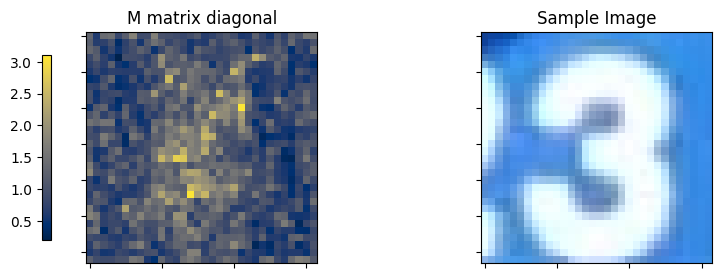

In [15]:
f, axarr = plt.subplots(1,2,figsize=(10, 3))
axarr[0].axes.xaxis.set_ticklabels([])
axarr[0].axes.yaxis.set_ticklabels([])
axarr[1].axes.xaxis.set_ticklabels([])
axarr[1].axes.yaxis.set_ticklabels([])

pcm = axarr[0].imshow(np.mean(np.diag(M).reshape(3,32,32),axis=0),cmap='cividis')
axarr[0].set_title("M matrix diagonal")
f.colorbar(mappable=pcm, ax=axarr[0], shrink=0.8,location="left")
axarr[1].imshow(torch.moveaxis(trainset0[3][0],0,2))
axarr[1].set_title("Sample Image")
print()

Here we plot the diagonal (averaged across channels) of the M matrix to see which coordinates are being highlighted by RFM. The center of the image is highlighted (where the digits appear). 